In [22]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset to dataframe
bookings_df = pd.read_csv('ncr_ride_bookings.csv')

In [2]:
#Examine dataframe for preprocessing
bookings_df.info()
bookings_df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,NaN,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,NaN,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,...,NaN,NaN,NaN,NaN,NaN,136.0,6.56,4.4,4.2,UPI
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,...,NaN,NaN,NaN,1.0,Other Issue,135.0,10.36,NaN,NaN,Cash


In [3]:
#create a copy of df so as not to accidentally modify original
df_copy = bookings_df.copy()

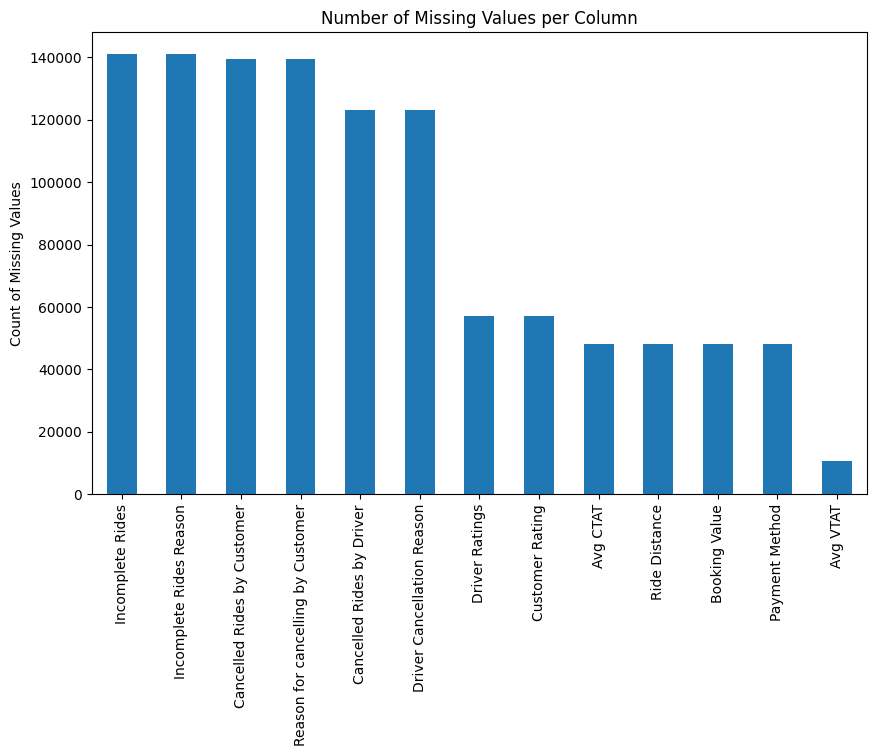

In [4]:
#examine nulls

import matplotlib.pyplot as plt
import seaborn as sns

null_counts = df_copy.isna().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)

#Plot
plt.figure(figsize=(10,6))
null_counts.plot(kind='bar')
plt.title('Number of Missing Values per Column')
plt.ylabel('Count of Missing Values')
plt.show()

In [5]:
#many null values are just n/a
#(e.g. cancelled rides, driver cancellation, and incomplete rides)
#noted by the equal number of nulls between each column 'pair'

#mark all null values for 'Cancelled Rides by Customer' to 0 to indicate no cancellation
#mark reason for cancelling by customer to na
df_copy['Cancelled Rides by Customer']=df_copy['Cancelled Rides by Customer'].fillna(0)
df_copy['Reason for cancelling by Customer'] = df_copy['Reason for cancelling by Customer'].fillna('na')

#repeat for cancelled rides by drive and reason, as well as incomplete rides and reason
df_copy['Cancelled Rides by Driver']=df_copy['Cancelled Rides by Driver'].fillna(0)
df_copy['Driver Cancellation Reason'] = df_copy['Driver Cancellation Reason'].fillna('na')

df_copy['Incomplete Rides']=df_copy['Incomplete Rides'].fillna(0)
df_copy['Incomplete Rides Reason'] = df_copy['Incomplete Rides Reason'].fillna('na')

df_copy.isna().sum()

Date                                     0
Time                                     0
Booking ID                               0
Booking Status                           0
Customer ID                              0
Vehicle Type                             0
Pickup Location                          0
Drop Location                            0
Avg VTAT                             10500
Avg CTAT                             48000
Cancelled Rides by Customer              0
Reason for cancelling by Customer        0
Cancelled Rides by Driver                0
Driver Cancellation Reason               0
Incomplete Rides                         0
Incomplete Rides Reason                  0
Booking Value                        48000
Ride Distance                        48000
Driver Ratings                       57000
Customer Rating                      57000
Payment Method                       48000
dtype: int64

In [6]:
#examine remaining null values
df_copy[df_copy['Booking Value'].isna()].head(20)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,na,0.0,na,0.0,na,NaN,NaN,NaN,NaN,NaN
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,na,0.0,na,0.0,na,NaN,NaN,NaN,NaN,NaN
11,2024-09-18,08:09:38,"""CNR9551927""",No Driver Found,"""CID7568143""",Auto,Vidhan Sabha,AIIMS,NaN,NaN,...,na,0.0,na,0.0,na,NaN,NaN,NaN,NaN,NaN
12,2024-06-25,22:44:15,"""CNR4386945""",Cancelled by Driver,"""CID5543520""",eBike,Patel Chowk,Kherki Daula Toll,4.6,NaN,...,na,1.0,Personal & Car related issues,0.0,na,NaN,NaN,NaN,NaN,NaN
17,2024-12-15,15:08:25,"""CNR6739317""",Cancelled by Driver,"""CID8682675""",Go Sedan,Vinobapuri,GTB Nagar,6.0,NaN,...,na,1.0,Customer related issue,0.0,na,NaN,NaN,NaN,NaN,NaN
18,2024-11-24,09:07:10,"""CNR6126048""",Cancelled by Customer,"""CID1060329""",eBike,Kashmere Gate,Anand Vihar,12.4,NaN,...,Driver is not moving towards pickup location,0.0,na,0.0,na,NaN,NaN,NaN,NaN,NaN
19,2024-05-24,19:53:57,"""CNR9465840""",Cancelled by Driver,"""CID9046501""",eBike,Pitampura,Rajiv Nagar,10.3,NaN,...,na,1.0,Customer related issue,0.0,na,NaN,NaN,NaN,NaN,NaN
26,2024-01-26,09:44:00,"""CNR3614535""",Cancelled by Driver,"""CID2507102""",Auto,Cyber Hub,Saket,11.5,NaN,...,na,1.0,Personal & Car related issues,0.0,na,NaN,NaN,NaN,NaN,NaN
27,2024-04-12,19:42:35,"""CNR4499383""",No Driver Found,"""CID5717521""",Premier Sedan,Sadar Bazar Gurgaon,Mehrauli,NaN,NaN,...,na,0.0,na,0.0,na,NaN,NaN,NaN,NaN,NaN
30,2024-05-18,17:37:52,"""CNR2178654""",Cancelled by Driver,"""CID3631860""",Go Mini,Qutub Minar,Vishwavidyalaya,9.2,NaN,...,na,1.0,More than permitted people in there,0.0,na,NaN,NaN,NaN,NaN,NaN


In [7]:
#check to find common reason for missing value
df_copy.loc[df_copy['Booking Value'].isna(), ['Booking Value', 'Booking Status']]

,Booking Value,Booking Status
0,NaN,No Driver Found
8,NaN,No Driver Found
11,NaN,No Driver Found
12,NaN,Cancelled by Driver
17,NaN,Cancelled by Driver
...,...,...
149979,NaN,Cancelled by Driver
149980,NaN,No Driver Found
149982,NaN,No Driver Found
149990,NaN,Cancelled by Driver


In [8]:
#ensure there are no missing booking values for completed rides
df_copy[(df_copy['Booking Status'] == 'Complete') & (df_copy['Booking Value'].isna())]

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method


In [9]:
df_copy['Booking Status'].unique()

array(['No Driver Found', 'Incomplete', 'Completed',
       'Cancelled by Driver', 'Cancelled by Customer'], dtype=object)

In [10]:
#excluding Incomplete and Completed, mark null booking values as 0
#null values for incomplete would follow business rules of leaving as null or filling with 0
#null booking values for completed rides should be flag if any

df_copy.loc[(df_copy['Booking Status'] != ('Incomplete', 'Completed')) & (df_copy['Booking Value'].isna()), 'Booking Value'] = 0

In [11]:
df_copy.loc[df_copy['Booking Value'], ['Booking Value', 'Booking Status']]

,Booking Value,Booking Status
0,0.0,No Driver Found
237,488.0,Completed
627,440.0,Completed
416,373.0,Completed
737,0.0,No Driver Found
...,...,...
475,76.0,Completed
1093,475.0,Incomplete
852,397.0,Completed
333,60.0,Completed


In [12]:
df_copy.isna().sum()

Date                                     0
Time                                     0
Booking ID                               0
Booking Status                           0
Customer ID                              0
Vehicle Type                             0
Pickup Location                          0
Drop Location                            0
Avg VTAT                             10500
Avg CTAT                             48000
Cancelled Rides by Customer              0
Reason for cancelling by Customer        0
Cancelled Rides by Driver                0
Driver Cancellation Reason               0
Incomplete Rides                         0
Incomplete Rides Reason                  0
Booking Value                            0
Ride Distance                        48000
Driver Ratings                       57000
Customer Rating                      57000
Payment Method                       48000
dtype: int64

In [13]:
#Avg CTAT, Ride Distance, and Payment method
#had the same number of nulls values as booking values
#can be inferred that it is for similar reasons and handled similarly
#Avg CTAT will be left as null and can be modified during later analysis if needed
df_copy.loc[(df_copy['Booking Status'] != ('Incomplete', 'Completed')) & (df_copy['Ride Distance'].isna()), 'Ride Distance'] = 0

df_copy.loc[(df_copy['Booking Status'] != ('Incomplete', 'Completed')) & (df_copy['Payment Method'].isna()), 'Payment Method'] = 'na'

df_copy.isna().sum()

Date                                     0
Time                                     0
Booking ID                               0
Booking Status                           0
Customer ID                              0
Vehicle Type                             0
Pickup Location                          0
Drop Location                            0
Avg VTAT                             10500
Avg CTAT                             48000
Cancelled Rides by Customer              0
Reason for cancelling by Customer        0
Cancelled Rides by Driver                0
Driver Cancellation Reason               0
Incomplete Rides                         0
Incomplete Rides Reason                  0
Booking Value                            0
Ride Distance                            0
Driver Ratings                       57000
Customer Rating                      57000
Payment Method                           0
dtype: int64

In [14]:
df_copy[df_copy['Avg CTAT'].isna()]['Booking Status'].value_counts()

Booking Status
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Name: count, dtype: int64

In [21]:
#These numbers explain the missing Avg VTAT and Avg CTAT
#It also explains missing driver and customer ratings

In [20]:
#finally check that date formatting is consistent
pd.to_datetime(df_copy['Date'], errors='coerce')
#if there are failures, formats are inconsistent

0        2024-03-23
1        2024-11-29
2        2024-08-23
3        2024-10-21
4        2024-09-16
            ...    
149995   2024-11-11
149996   2024-11-24
149997   2024-09-18
149998   2024-10-05
149999   2024-03-10
Name: Date, Length: 150000, dtype: datetime64[ns]


 Analyzing column: Date
Data type: object
Date
2024-11-16    462
2024-05-09    456
2024-09-18    456
2024-10-12    452
2024-01-26    452
2024-02-06    452
2024-07-17    451
2024-10-09    451
2024-10-13    451
2024-11-29    450
Name: count, dtype: int64


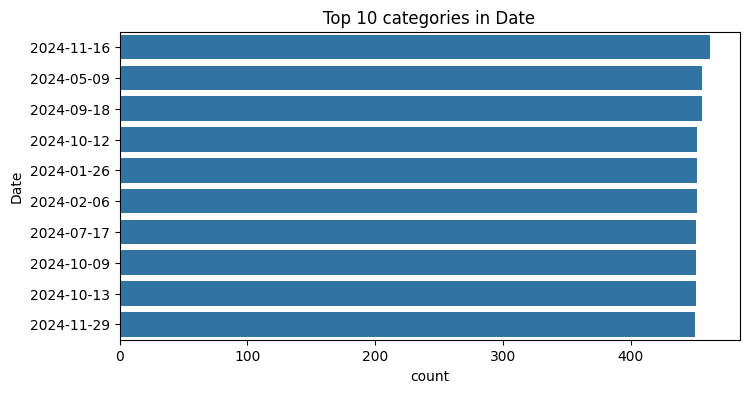


 Analyzing column: Time
Data type: object
Time
17:44:57    16
19:17:33    12
17:54:33    11
11:29:50    11
10:23:23    11
17:55:08    11
15:23:56    11
18:59:55    11
19:26:48    11
18:10:37    10
Name: count, dtype: int64


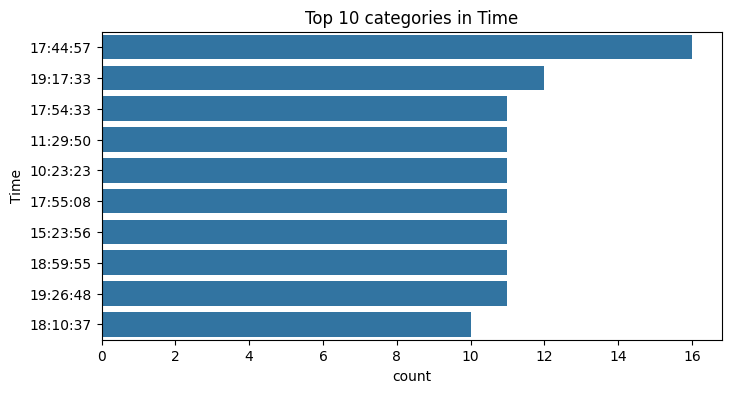


 Analyzing column: Booking ID
Data type: object
Booking ID
"CNR3648267"    3
"CNR9603232"    3
"CNR7642097"    3
"CNR7585544"    3
"CNR7908610"    3
"CNR2726142"    3
"CNR5292943"    3
"CNR7199036"    3
"CNR6337479"    3
"CNR5434375"    2
Name: count, dtype: int64


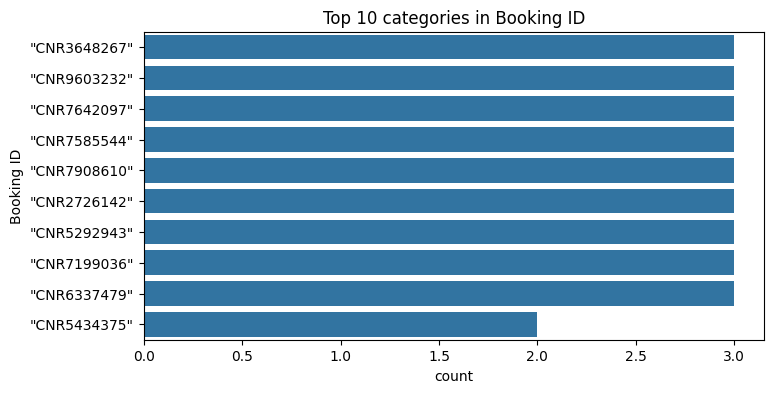


 Analyzing column: Booking Status
Data type: object
Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64


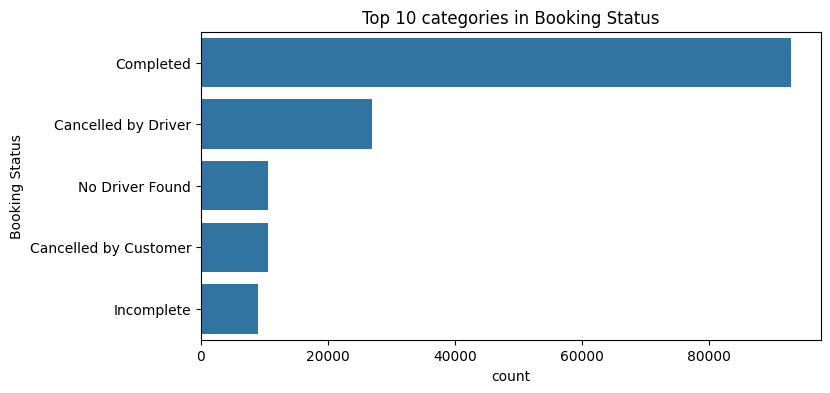


 Analyzing column: Customer ID
Data type: object
Customer ID
"CID6715450"    3
"CID4523979"    3
"CID6468528"    3
"CID7828101"    3
"CID8727691"    3
"CID5481002"    3
"CID3298594"    2
"CID8680982"    2
"CID4865181"    2
"CID7019569"    2
Name: count, dtype: int64


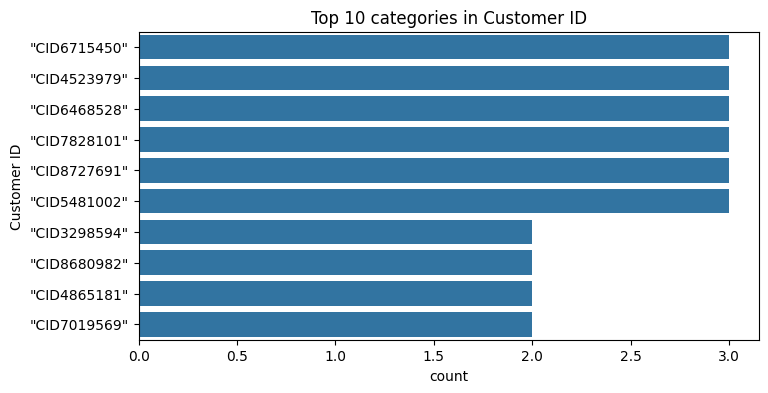


 Analyzing column: Vehicle Type
Data type: object
Vehicle Type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
eBike            10557
Uber XL           4449
Name: count, dtype: int64


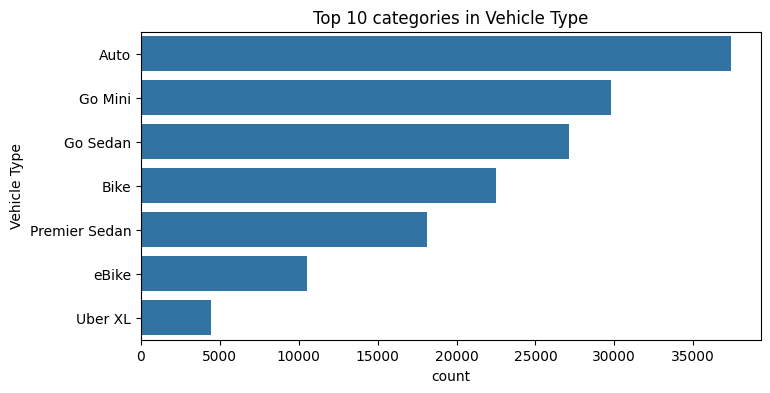


 Analyzing column: Pickup Location
Data type: object
Pickup Location
Khandsa             949
Barakhamba Road     946
Saket               931
Badarpur            921
Pragati Maidan      920
Madipur             919
AIIMS               918
Mehrauli            915
Dwarka Sector 21    914
Pataudi Chowk       907
Name: count, dtype: int64


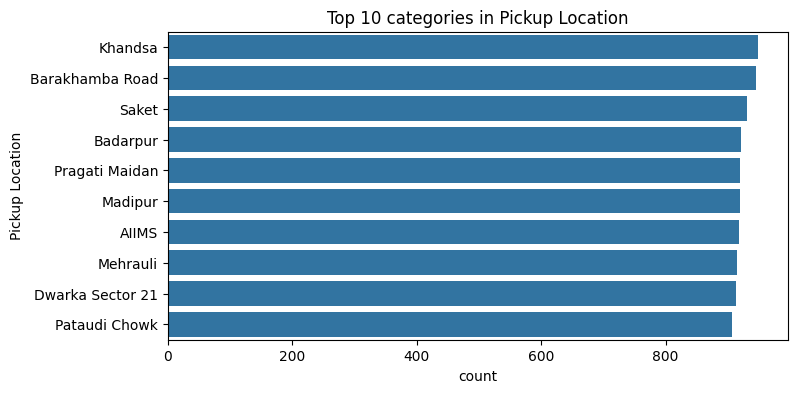


 Analyzing column: Drop Location
Data type: object
Drop Location
Ashram                936
Basai Dhankot         917
Lok Kalyan Marg       916
Narsinghpur           913
Cyber Hub             912
Kalkaji               912
Kashmere Gate ISBT    909
Udyog Vihar           906
Lajpat Nagar          904
Madipur               902
Name: count, dtype: int64


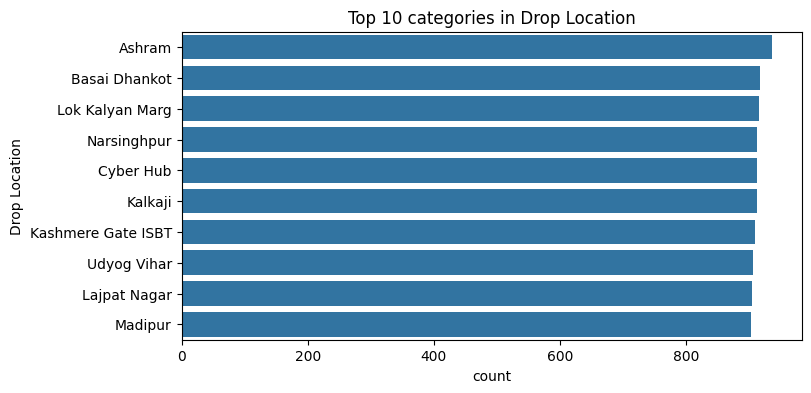


 Analyzing column: Avg VTAT
Data type: float64
count    139500.000000
mean          8.456352
std           3.773564
min           2.000000
25%           5.300000
50%           8.300000
75%          11.300000
max          20.000000
Name: Avg VTAT, dtype: float64


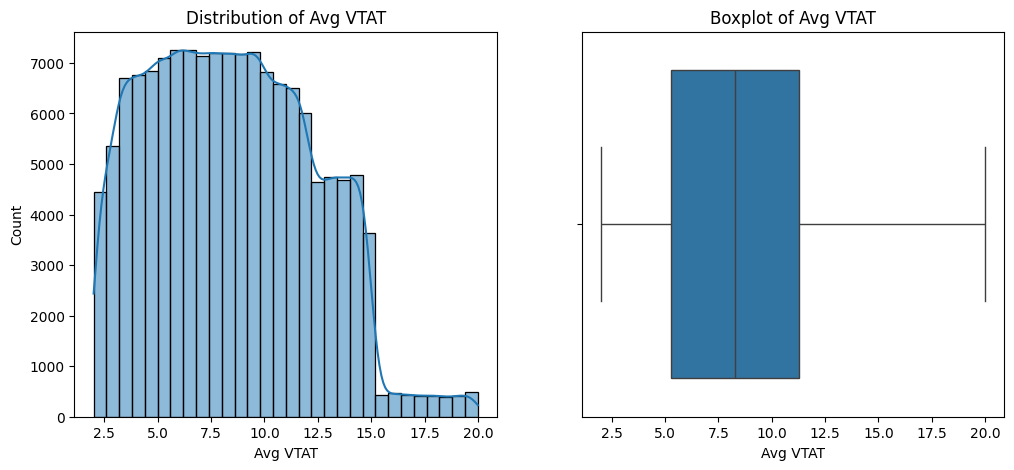


 Analyzing column: Avg CTAT
Data type: float64
count    102000.000000
mean         29.149636
std           8.902577
min          10.000000
25%          21.600000
50%          28.800000
75%          36.800000
max          45.000000
Name: Avg CTAT, dtype: float64


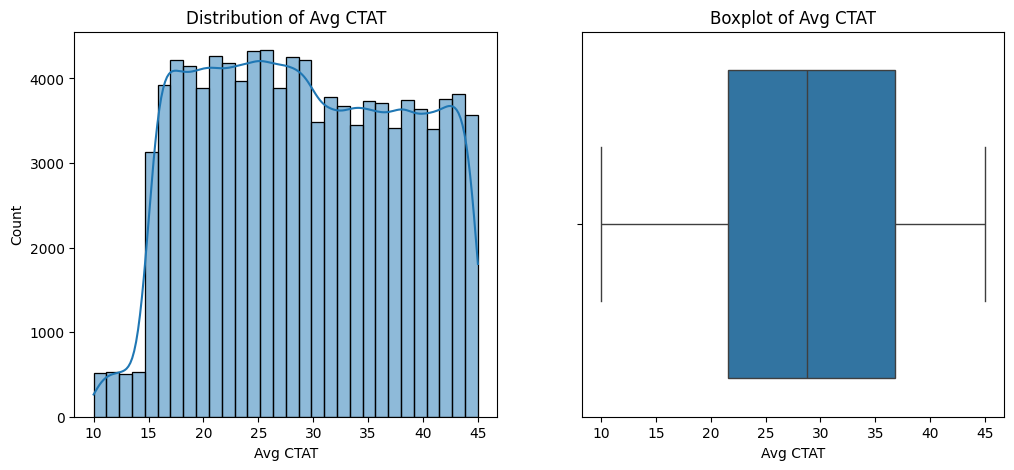


 Analyzing column: Cancelled Rides by Customer
Data type: float64
count    150000.000000
mean          0.070000
std           0.255148
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Cancelled Rides by Customer, dtype: float64


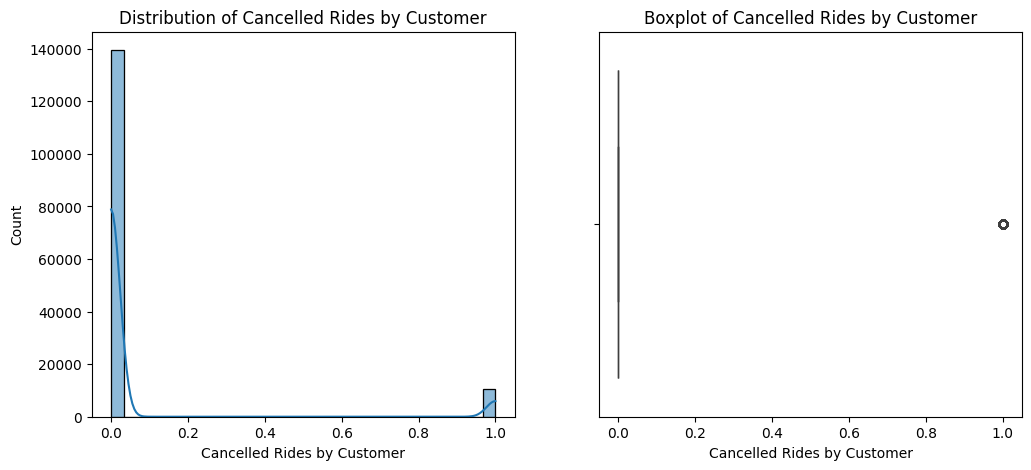


 Analyzing column: Reason for cancelling by Customer
Data type: object
Reason for cancelling by Customer
na                                              139500
Wrong Address                                     2362
Change of plans                                   2353
Driver is not moving towards pickup location      2335
Driver asked to cancel                            2295
AC is not working                                 1155
Name: count, dtype: int64


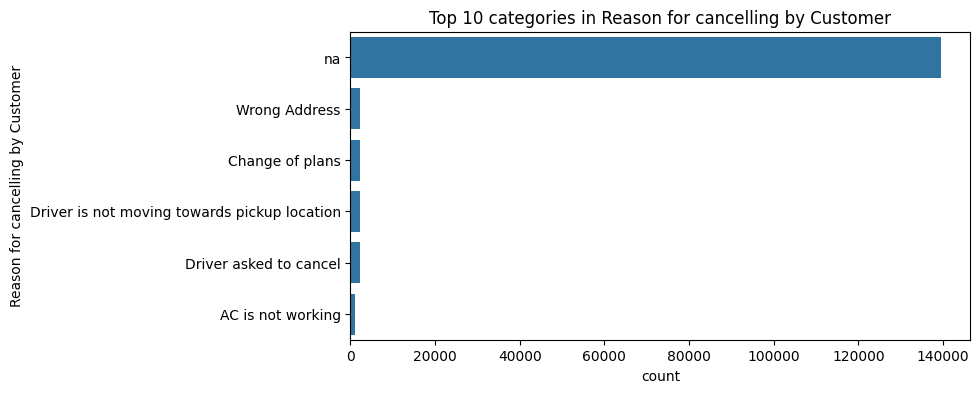


 Analyzing column: Cancelled Rides by Driver
Data type: float64
count    150000.000000
mean          0.180000
std           0.384189
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Cancelled Rides by Driver, dtype: float64


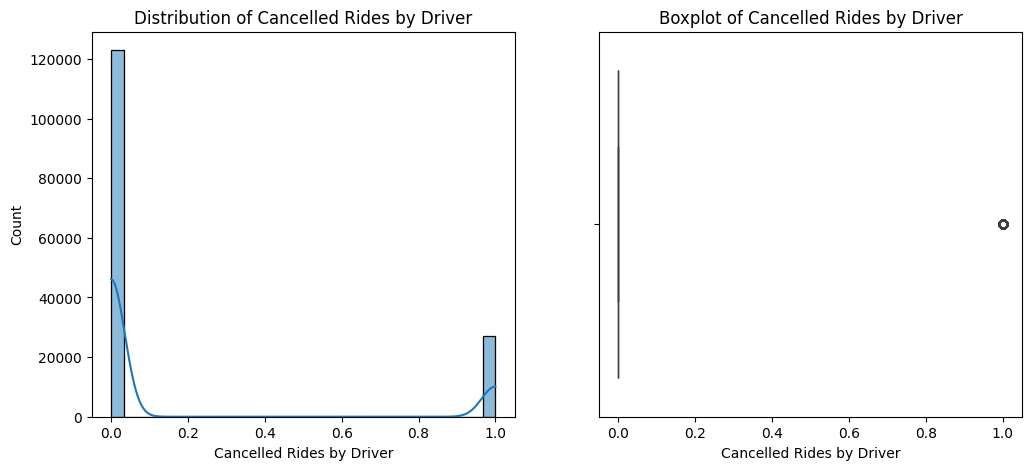


 Analyzing column: Driver Cancellation Reason
Data type: object
Driver Cancellation Reason
na                                     123000
Customer related issue                   6837
The customer was coughing/sick           6751
Personal & Car related issues            6726
More than permitted people in there      6686
Name: count, dtype: int64


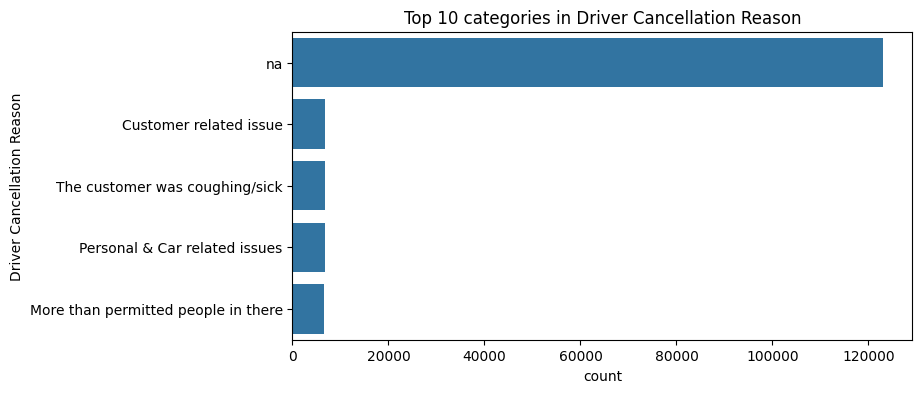


 Analyzing column: Incomplete Rides
Data type: float64
count    150000.000000
mean          0.060000
std           0.237488
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Incomplete Rides, dtype: float64


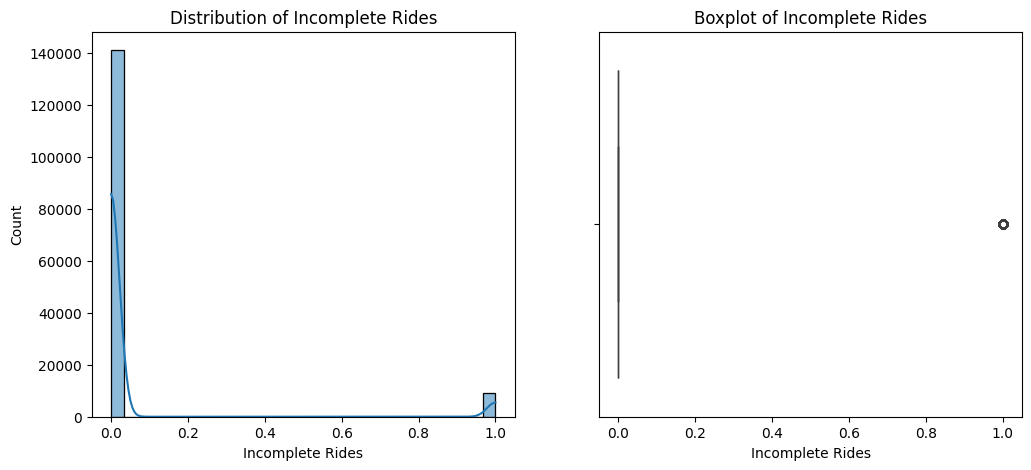


 Analyzing column: Incomplete Rides Reason
Data type: object
Incomplete Rides Reason
na                   141000
Customer Demand        3040
Vehicle Breakdown      3012
Other Issue            2948
Name: count, dtype: int64


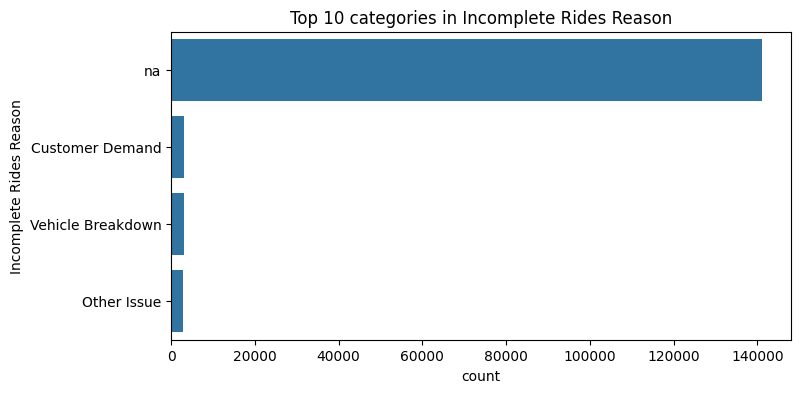


 Analyzing column: Booking Value
Data type: float64
count    150000.000000
mean        345.641220
std         403.423487
min           0.000000
25%           0.000000
50%         244.000000
75%         521.000000
max        4277.000000
Name: Booking Value, dtype: float64


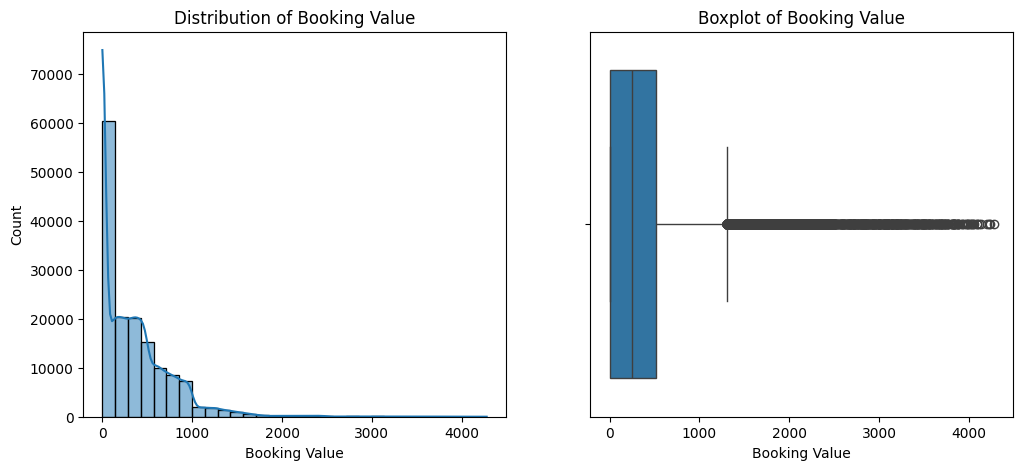


 Analyzing column: Ride Distance
Data type: float64
count    150000.000000
mean         16.753168
std          16.291118
min           0.000000
25%           0.000000
50%          13.060000
75%          30.650000
max          50.000000
Name: Ride Distance, dtype: float64


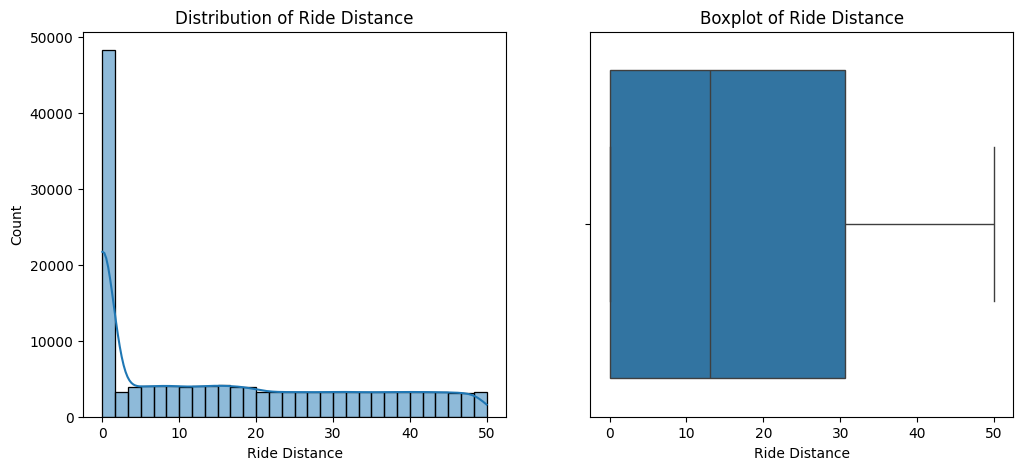


 Analyzing column: Driver Ratings
Data type: float64
count    93000.000000
mean         4.230992
std          0.436871
min          3.000000
25%          4.100000
50%          4.300000
75%          4.600000
max          5.000000
Name: Driver Ratings, dtype: float64


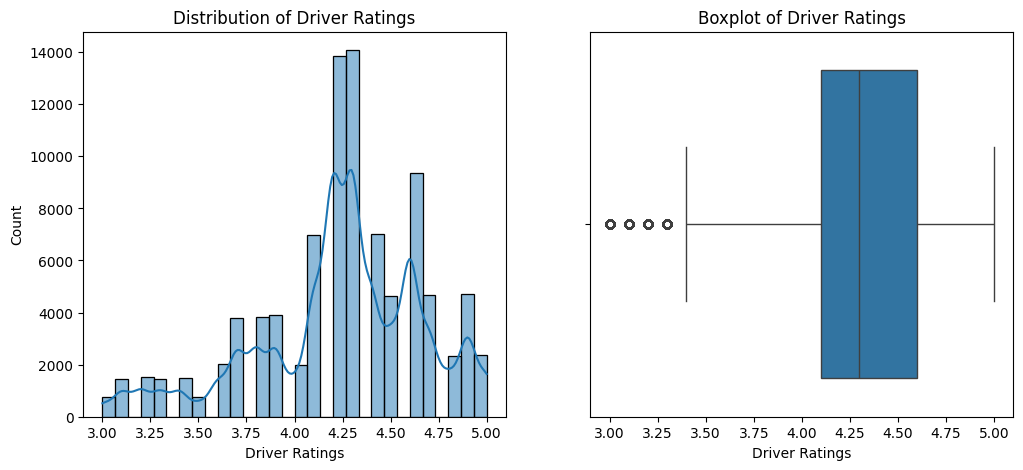


 Analyzing column: Customer Rating
Data type: float64
count    93000.000000
mean         4.404584
std          0.437819
min          3.000000
25%          4.200000
50%          4.500000
75%          4.800000
max          5.000000
Name: Customer Rating, dtype: float64


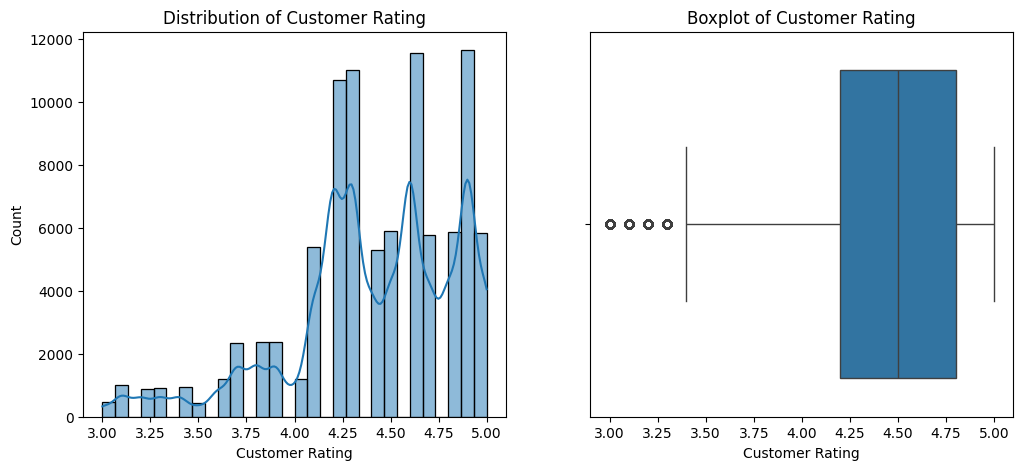


 Analyzing column: Payment Method
Data type: object
Payment Method
na             48000
UPI            45909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
Name: count, dtype: int64


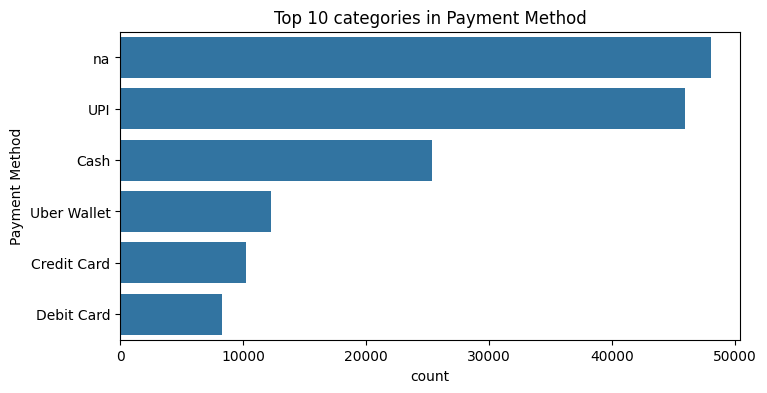

In [32]:
#on to univariate and multivariate analysis

#univariate analysis automated
#reusable function
from pandas.api.types import (
    is_numeric_dtype,
    is_datetime64_any_dtype
)

def univariate_analysis(df, max_categories=10):

    for col in df.columns:
        print(f"\n Analyzing column: {col}")
        print("="*50)

        dtype = df[col].dtype
        print(f"Data type: {dtype}")

        #Numeric variables
        if is_numeric_dtype(df[col]):
            print(df[col].describe())
            
            plt.figure(figsize=(12,5))
            
            # Histogram + KDE
            plt.subplot(1,2,1)
            sns.histplot(df[col].dropna(), kde=True, bins=30)
            plt.title(f"Distribution of {col}")
            
            # Boxplot
            plt.subplot(1,2,2)
            sns.boxplot(x=df[col])
            plt.title(f"Boxplot of {col}")
            
            plt.show()

        #Categorical variables
        elif isinstance(dtype, pd.CategoricalDtype) or df[col].dtype == "object":
            print(df[col].value_counts().head(max_categories))
            
            plt.figure(figsize=(8,4))
            sns.countplot(y=df[col], order=df[col].value_counts().index[:max_categories])
            plt.title(f"Top {max_categories} categories in {col}")
            plt.show()

        #Datetime variables
        elif is_datetime64_any_dtype(df[col]):
            print(df[col].describe(datetime_is_numeric=True))
            
            plt.figure(figsize=(10,4))
            df[col].dt.to_period("M").value_counts().sort_index().plot(kind="bar")
            plt.title(f"Counts per Month for {col}")
            plt.show()

        else:
            print("Column type not handled yet.")

univariate_analysis(df_copy)